The Sparks Foundation - Internship

Data Science and Business Analytics @GRIP

Task 1 :- Prediction using Unsupervised ML

Objective :- Predict the optimum number of clusters and represent it visually.

Author :- Sohan Chincholkar

Installing necessary packages and Importing the libraries.

In [1]:
install.packages("ggcorrplot")
install.packages("GGally")
install.packages("ggplot2")
install.packages("gridExtra")
install.packages("ggplot")
library(ggcorrplot)
library(GGally)
library(graphics)
library(readr)
library(dplyr)
library(ggplot2)
library(cluster)
library(gridExtra)

Installing package into 'C:/Users/Sohan/Documents/R/win-library/4.1'
(as 'lib' is unspecified)

Warning message:
"unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'"
Warning message:
"package 'ggcorrplot' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"
Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/4.1:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/4.1/PACKAGES'"
Installing package into 'C:/Users/Sohan/Documents/R/win-library/4.1'
(as 'lib' is unspecified)

Warning message:
"unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'"
Warning message:
"package 'GGall

Importing the dataset

iris <- read.csv("iris.csv")

In [2]:
head(iris) #Reading first few rows of dataset

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


Determining the structure of the dataset

In [3]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


Checking for NAs

In [4]:
table(is.na(iris))


FALSE 
  750 

Visualizing the database

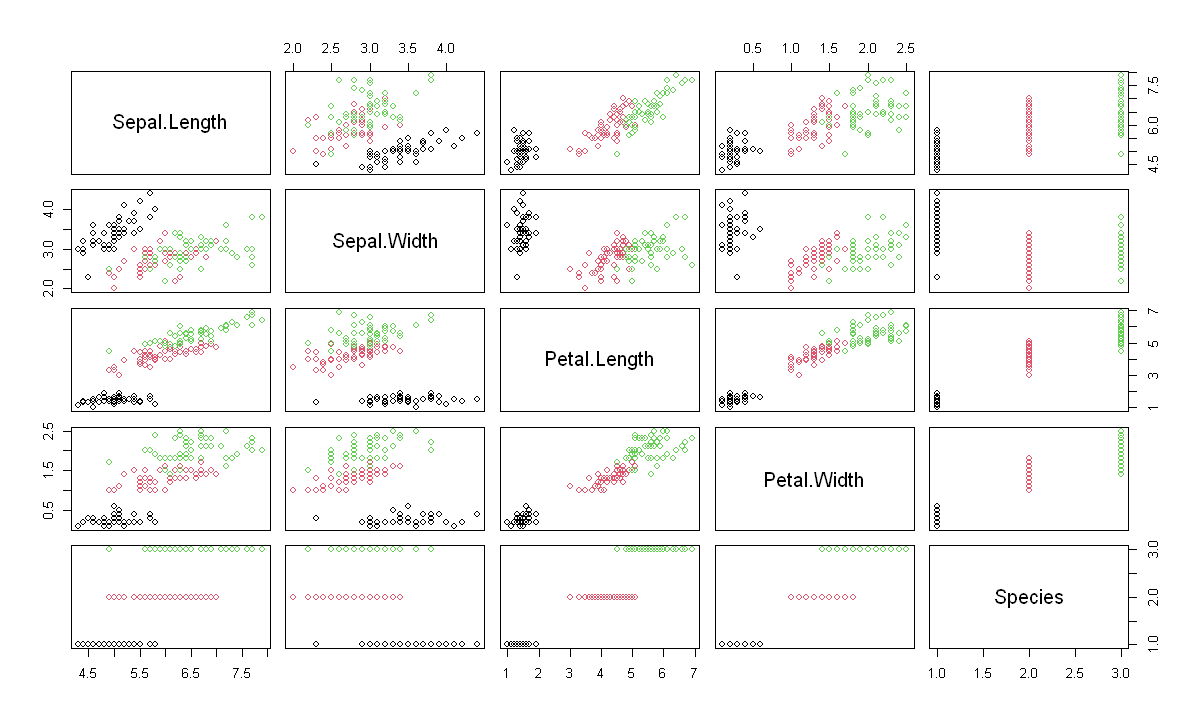

In [5]:
options(repr.plot.width=10,repr.plot.height=6)
plot(iris,col=iris$Species)

Visualizing the Sepal Length vs Sepal Width

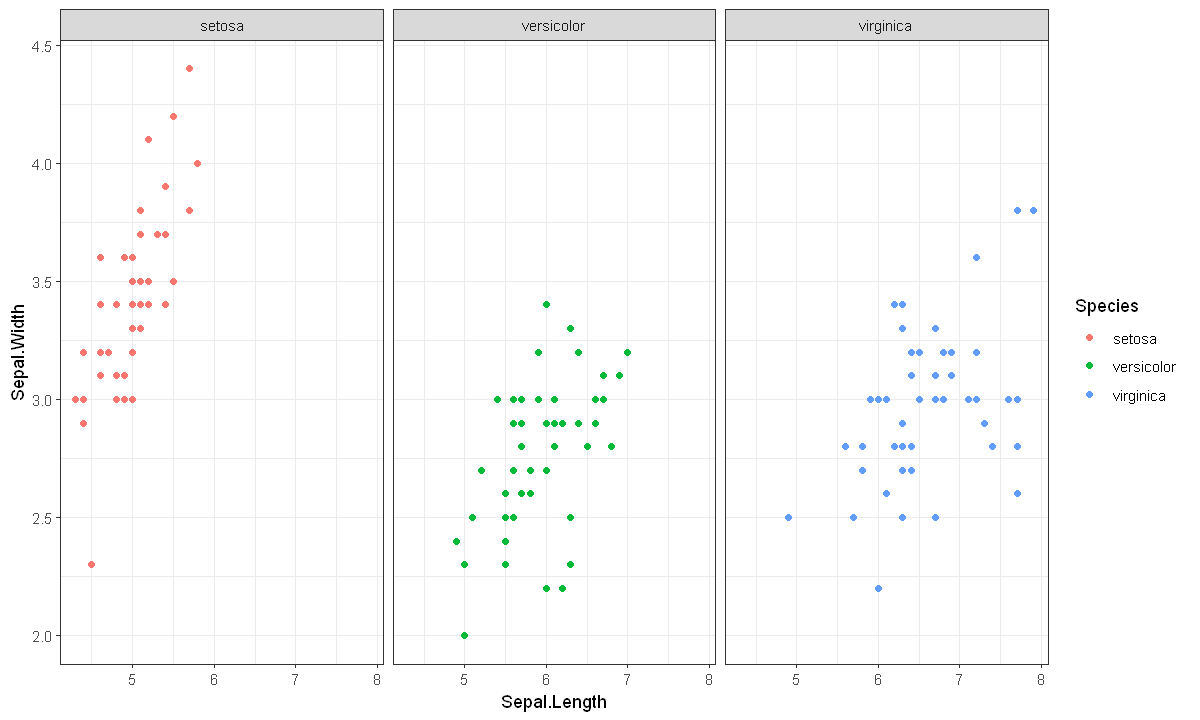

In [6]:
ggplot(iris)+
  geom_point(aes(x=Sepal.Length,y=Sepal.Width,color=Species))+
  facet_wrap(~ Species)+
  theme_bw()

Visualizing the Petal Length vs Petal Width

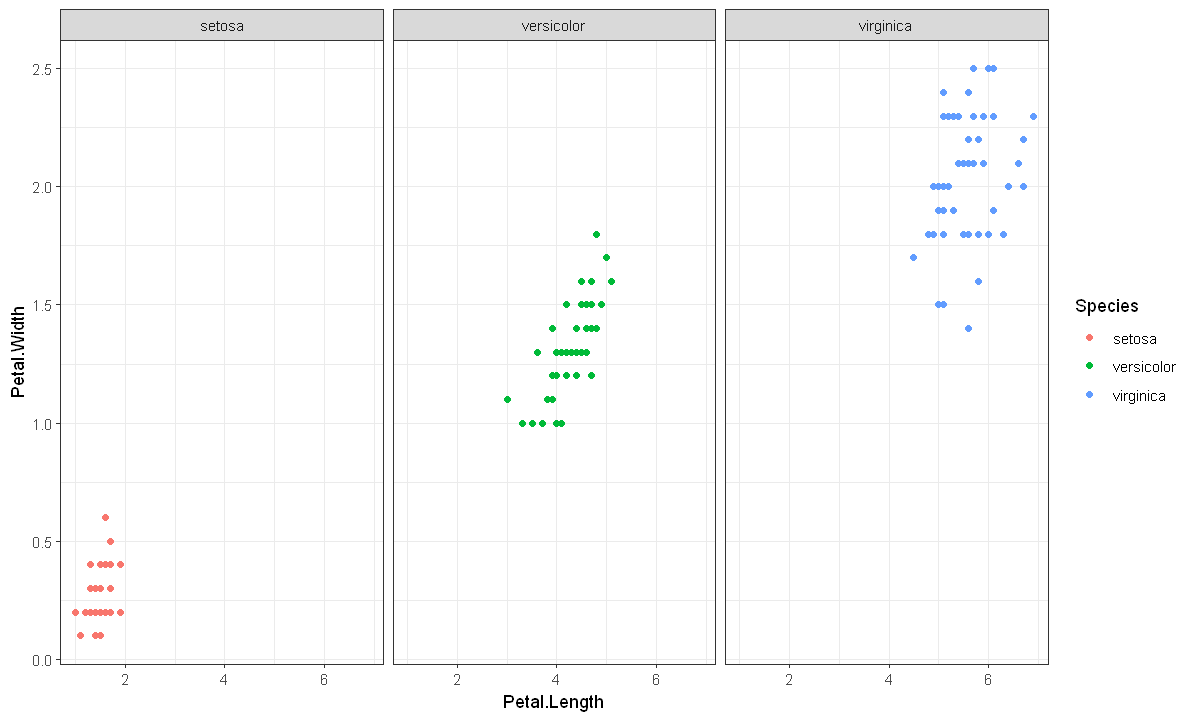

In [7]:
ggplot(iris)+
  geom_point(aes(x=Petal.Length,y=Petal.Width,color=Species))+
  facet_wrap(~ Species)+
  theme_bw()

Correlation plot of the data

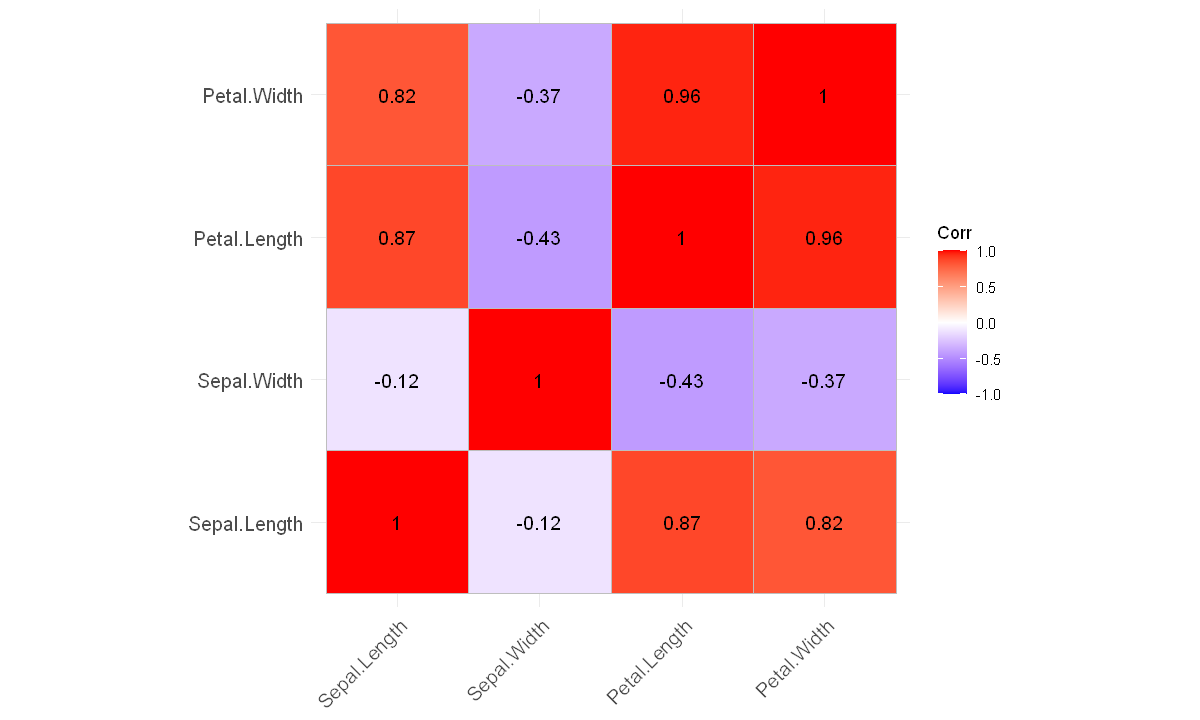

In [8]:
ggcorrplot(cor(iris[,1:4]),lab=TRUE)

Pairs plot of the data

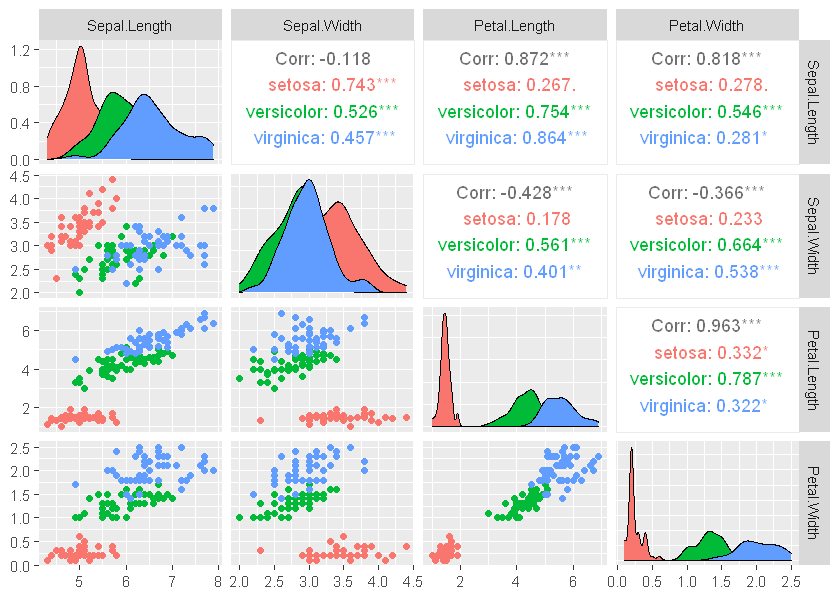

In [9]:
options(repr.plot.width=7, repr.plot.height=5)
ggpairs(data=iris,column=1:4,aes(col=Species))

From the correlation plot and the pairs plot , we can conclude that Species is mainly dependent on Petal Length and Petal Width.

Elbow method using within cluster sum of square (wcss)

In [10]:
set.seed(234)
iris_k <- iris[,1:4]
iris_k <- as.matrix(iris_k)
k_max <-6
wss <- sapply(1:k_max,function(k){kmeans(iris_k,k,iter.max=100,nstart=10)$tot.withinss})
wss

[1] 681.37060 152.34795  78.85144  57.22847  46.44618  39.03999

Finding optimum number of cluster by visualizing the Elbow graph

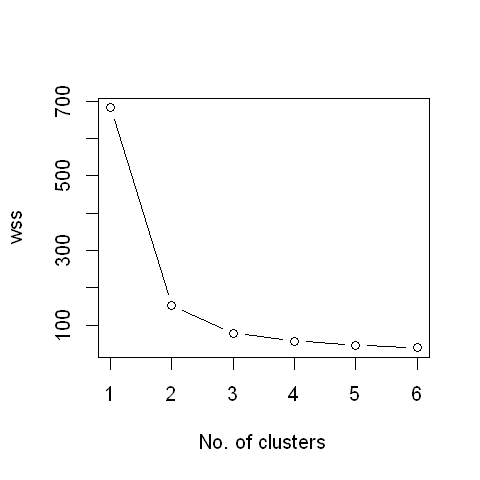

In [11]:
options(repr.plot.width=4,repr.plot.height=4)
plot(1:k_max,wss,type="b",xlab="No. of clusters")

Forming the cluster using k-means clustering

In [12]:
iris_cluster<- kmeans(iris_k,3,nstart=10,iter.max=100)
iris_cluster

K-means clustering with 3 clusters of sizes 38, 50, 62

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     6.850000    3.073684     5.742105    2.071053
2     5.006000    3.428000     1.462000    0.246000
3     5.901613    2.748387     4.393548    1.433871

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 1 1 3 1 1 1 1
[112] 1 1 3 3 1 1 1 1 3 1 3 1 3 1 1 3 3 1 1 1 1 1 3 1 1 1 1 3 1 1 1 3 1 1 1 3 1
[149] 1 3

Within cluster sum of squares by cluster:
[1] 23.87947 15.15100 39.82097
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

Visualizing the cluster

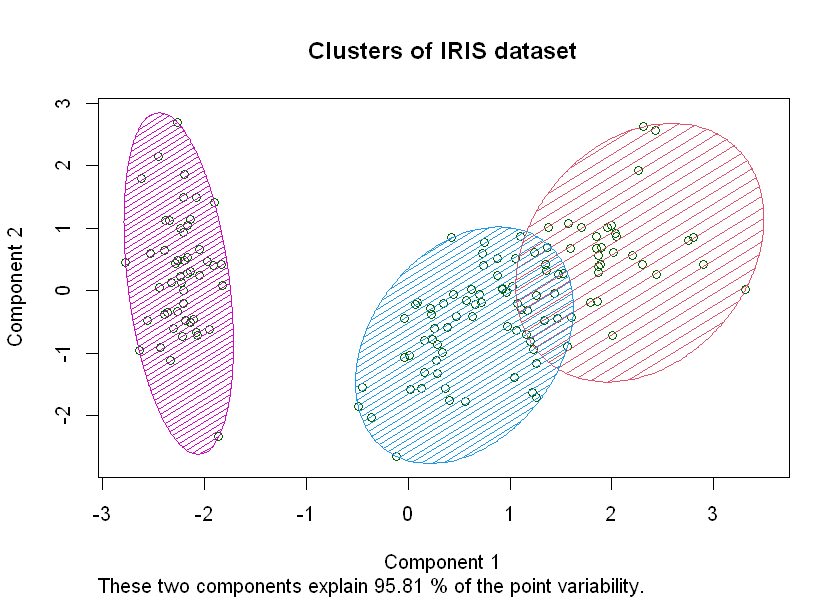

In [13]:
options(repr.plot.width=7,repr.plot.height=5)
clusplot(iris_k,iris_cluster$cluster,lines=0,shade=TRUE,color=TRUE,plotchar=FALSE,
         main="Clusters of IRIS dataset")

Combining the cluster number allocated to the iris dataset

In [14]:
clustered_data<- cbind(iris,cluster_number=iris_cluster$cluster)
head(clustered_data)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,cluster_number
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>
1,5.1,3.5,1.4,0.2,setosa,2
2,4.9,3.0,1.4,0.2,setosa,2
3,4.7,3.2,1.3,0.2,setosa,2
4,4.6,3.1,1.5,0.2,setosa,2
5,5.0,3.6,1.4,0.2,setosa,2
6,5.4,3.9,1.7,0.4,setosa,2


In [15]:
table(clustered_data$Species,clustered_data$cluster_number)

            
              1  2  3
  setosa      0 50  0
  versicolor  2  0 48
  virginica  36  0 14

In [16]:
clustered_data$cluster_number <- as.factor(clustered_data$cluster_number)

Comparing Sepal Length vs Sepal Width plot

In [17]:
a<- iris %>% ggplot(aes(x=Sepal.Length,y=Sepal.Width,color=Species))+geom_point()+theme(legend.position="bottom")
b<- clustered_data %>% ggplot(aes(x=Sepal.Length,y=Sepal.Width))+
  geom_point(aes(color=cluster_number))+
  geom_point(aes(x=iris_cluster$centers[1,1],y=iris_cluster$centers[1,2]),pch=24,size=3,fill="black")+
  geom_point(aes(x=iris_cluster$centers[2,1],y=iris_cluster$centers[2,2]),pch=24,size=3,fill="black")+
  geom_point(aes(x=iris_cluster$centers[3,1],y=iris_cluster$centers[3,2]),pch=24,size=3,fill="black")+
  theme(legend.position= "bottom")

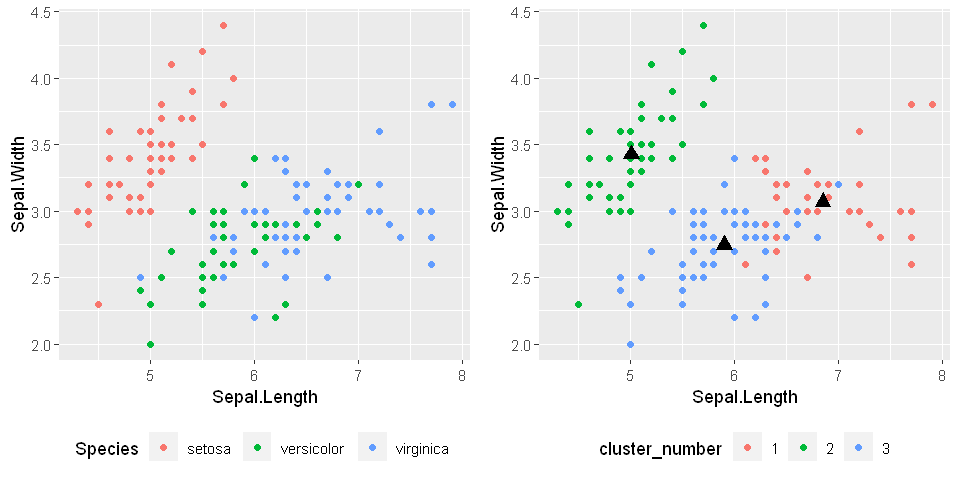

In [18]:
options(repr.plot.width=8,repr.plot.height=4)
grid.arrange(a,b,ncol=2)

Comparing Petal Length vs Petal Width plot

In [19]:
c<- iris %>% ggplot(aes(x=Petal.Length,y=Petal.Width,color=Species))+geom_point()+theme(legend.position="bottom")
d<- clustered_data %>% ggplot(aes(x=Petal.Length,y=Petal.Width))+
  geom_point(aes(color=cluster_number))+
  geom_point(aes(x=iris_cluster$centers[1,3],y=iris_cluster$centers[1,4]),pch=24,size=3,fill="black")+
  geom_point(aes(x=iris_cluster$centers[2,3],y=iris_cluster$centers[2,4]),pch=24,size=3,fill="black")+
  geom_point(aes(x=iris_cluster$centers[3,3],y=iris_cluster$centers[3,4]),pch=24,size=3,fill="black")+
  theme(legend.position= "bottom")

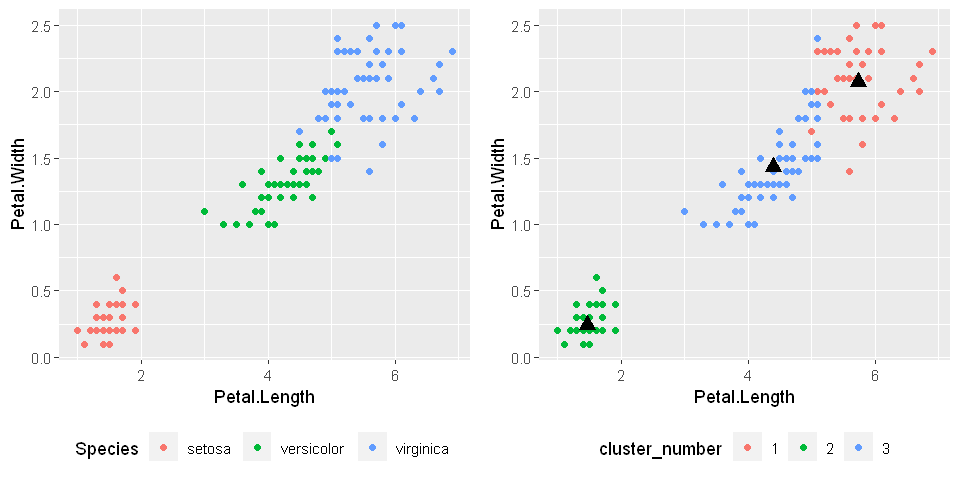

In [20]:
options(repr.plot.width=8,repr.plot.height=4)
grid.arrange(c,d,ncol=2)

# Conclusion
We can conclude that our plotted graphs of predicted clusters are almost similar to actual ones with 89% accuracy.